# Tracing plastic in the Indian Ocean

We use the parcels package with surface currents from OSCAR to evolve particles backwards in time from the Seychelles and Aldabra.

In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile
import numpy as np
import math
from datetime import timedelta, datetime
from operator import attrgetter

In [2]:
# Load in the data
filenames = {'U': "/work/gam/oscar/oscar_vel201*.nc",
             'V': "/work/gam/oscar/oscar_vel201*.nc"}
variables = {'U': 'u',
             'V': 'v'}
dimensions = {'lat': 'latitude',
              'lon': 'longitude',
              'time': 'time'}
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions);

In [3]:
# Define particle set
pset = ParticleSet.from_line(fieldset=fieldset, pclass=JITParticle,
                             size=1000,           # releasing N particles
                             start=(46, -9),   # releasing on a line: the start longitude and latitude
                             finish=(47, -9),  # releasing on a line: the end longitude and latitude
                             time=datetime(2017, 12, 31, 0))  # releasing at a certain time

In [5]:
# Calculate trajectories
pset.execute(AdvectionRK4,
             runtime=timedelta(days=720),
             dt=-timedelta(minutes=5),
             output_file=pset.ParticleFile(name="seychelles_1000p.nc", outputdt=timedelta(days=5)));

100% (62208000.0 of 62208000.0) |########| Elapsed Time: 0:05:41 Time:  0:05:41


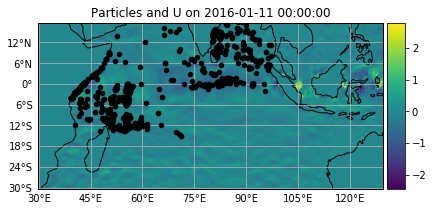

In [6]:
pset.show(domain=[18, -30, 130, 30],
         field=fieldset.U)

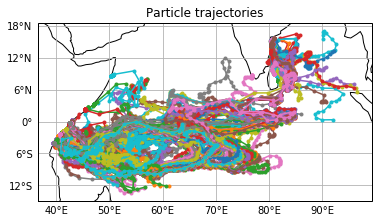

In [7]:
ax=plotTrajectoriesFile('seychelles_1000p.nc');